# Notebook example on how to read-only with xarray files on the metno s3 store

key, secret key and endpoint can also be used to browse the store in jupyterlab bucket explorer

In [1]:
import s3fs
import xarray as xr
import numpy as np
import pandas as pd
import s3fs

In [2]:
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", 
                       secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", 
                       client_kwargs=dict(endpoint_url="https://rgw.met.no"))
s3.ls('escience2022')

['escience2022/Ada',
 'escience2022/Antoine',
 'escience2022/Dominic',
 'escience2022/ESA_SMOS_sss',
 'escience2022/Remy',
 'escience2022/Sara',
 'escience2022/Zhihong']

In [3]:
s3path = "s3://escience2022/Zhihong/o3_AERmon_GISS-E2-1-G_historical_r1i1p3f1_gn_185001-190012.nc"

In [3]:
s3path

's3://escience2022/Zhihong/o3_AERmon_GISS-E2-1-G_historical_r1i1p3f1_gn_185001-190012.nc'

In [4]:
do = xr.open_dataset(s3.open(s3path))
do

<xarray.Dataset>
Dimensions:    (time: 612, bnds: 2, lev: 40, lat: 90, lon: 144)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 1900-12-16 12:00:00
  * lev        (lev) float64 0.95 0.93 0.91 0.89 0.87 ... 0.23 0.21 0.19 0.17
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lev_bnds   (lev, bnds) float64 ...
    p0         float64 ...
    a          (lev) float64 ...
    b          (lev) float64 ...
    ps         (time, lat, lon) float32 ...
    a_bnds     (lev, bnds) float64 ...
    b_bnds     (lev, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    o3         (time, lev, lat, lon) float32 ...
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                Kenneth Lo (cdkkl@giss.nasa.gov)
    ...                     ...
    title:                  GISS-E2-1-G output prepared for CMIP6
    tracking_id:            hdl:21.14100/0597de11-e334-4b70-9ff6-435e00c6dca2
    variable_id:            o3
    variant_label:          r1i1p3f1
    license:                CMIP6 model data produced by NASA Goddard Institu...
    cmor_version:           3.3.2

In [16]:
dp=do['a']*do['p0']+do['b']*do['ps'] #da['variable'] format can be used in loops etc. da.variable can't

In [35]:
dp[1]-dp[0]

<xarray.DataArray (time: 612, lat: 90, lon: 144)>
array([[[-1400.48127043, -1400.48127043, -1400.48127043, ...,
         -1400.48127043, -1400.48127043, -1400.48127043],
        [-1449.22052161, -1444.99500275, -1439.96449459, ...,
         -1459.8222735 , -1455.43572501, -1452.07061884],
        [-1457.70967287, -1454.09412912, -1450.97723725, ...,
         -1473.94587339, -1467.32158489, -1461.98839186],
        ...,
        [-2068.63254818, -2069.67892309, -2070.64081304, ...,
         -2065.57012688, -2066.6165018 , -2067.65684208],
        [-2065.59013648, -2066.18153126, -2066.75593376, ...,
         -2063.83659697, -2064.42243352, -2065.0087465 ],
        [-2063.29522618, -2063.29522618, -2063.29522618, ...,
         -2063.29522618, -2063.29522618, -2063.29522618]],

       [[-1386.18552447, -1386.18552447, -1386.18552447, ...,
         -1386.18552447, -1386.18552447, -1386.18552447],
        [-1436.54475904, -1432.58778168, -1427.82597383, ...,
         -1447.06615492, -1442.42376943, -1439.26352344],
        [-1444.42218831, -1440.84094673, -1437.77661976, ...,
         -1460.2990101 , -1454.08253626, -1448.59943005],
...
        [-2052.97360867, -2052.73254066, -2052.38221389, ...,
         -2053.99695667, -2053.56166851, -2053.22118774],
        [-2053.08826684, -2053.18545632, -2053.31567751, ...,
         -2052.97487912, -2052.95709281, -2053.04364226],
        [-2056.24279581, -2056.24279581, -2056.24279581, ...,
         -2056.24279581, -2056.24279581, -2056.24279581]],

       [[-1382.61539933, -1382.61539933, -1382.61539933, ...,
         -1382.61539933, -1382.61539933, -1382.61539933],
        [-1433.91397336, -1429.82645719, -1424.93252247, ...,
         -1444.67119664, -1439.98228089, -1436.74549025],
        [-1443.84413326, -1440.07962918, -1436.71388779, ...,
         -1460.06032419, -1453.70028942, -1448.17144699],
        ...,
        [-2048.88498086, -2048.87910502, -2048.7857269 , ...,
         -2048.83670373, -2048.8584602 , -2048.87815219],
        [-2044.71218569, -2044.72187288, -2044.81334533, ...,
         -2044.5794236 , -2044.66502021, -2044.73521261],
        [-2037.40058339, -2037.40058339, -2037.40058339, ...,
         -2037.40058339, -2037.40058339, -2037.40058339]]])
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 1900-12-16 12:00:00
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8

In [36]:
-(dp[1]-dp[0])

<xarray.DataArray (time: 612, lat: 90, lon: 144)>
array([[[1400.48127043, 1400.48127043, 1400.48127043, ...,
         1400.48127043, 1400.48127043, 1400.48127043],
        [1449.22052161, 1444.99500275, 1439.96449459, ...,
         1459.8222735 , 1455.43572501, 1452.07061884],
        [1457.70967287, 1454.09412912, 1450.97723725, ...,
         1473.94587339, 1467.32158489, 1461.98839186],
        ...,
        [2068.63254818, 2069.67892309, 2070.64081304, ...,
         2065.57012688, 2066.6165018 , 2067.65684208],
        [2065.59013648, 2066.18153126, 2066.75593376, ...,
         2063.83659697, 2064.42243352, 2065.0087465 ],
        [2063.29522618, 2063.29522618, 2063.29522618, ...,
         2063.29522618, 2063.29522618, 2063.29522618]],

       [[1386.18552447, 1386.18552447, 1386.18552447, ...,
         1386.18552447, 1386.18552447, 1386.18552447],
        [1436.54475904, 1432.58778168, 1427.82597383, ...,
         1447.06615492, 1442.42376943, 1439.26352344],
        [1444.42218831, 1440.84094673, 1437.77661976, ...,
         1460.2990101 , 1454.08253626, 1448.59943005],
...
        [2052.97360867, 2052.73254066, 2052.38221389, ...,
         2053.99695667, 2053.56166851, 2053.22118774],
        [2053.08826684, 2053.18545632, 2053.31567751, ...,
         2052.97487912, 2052.95709281, 2053.04364226],
        [2056.24279581, 2056.24279581, 2056.24279581, ...,
         2056.24279581, 2056.24279581, 2056.24279581]],

       [[1382.61539933, 1382.61539933, 1382.61539933, ...,
         1382.61539933, 1382.61539933, 1382.61539933],
        [1433.91397336, 1429.82645719, 1424.93252247, ...,
         1444.67119664, 1439.98228089, 1436.74549025],
        [1443.84413326, 1440.07962918, 1436.71388779, ...,
         1460.06032419, 1453.70028942, 1448.17144699],
        ...,
        [2048.88498086, 2048.87910502, 2048.7857269 , ...,
         2048.83670373, 2048.8584602 , 2048.87815219],
        [2044.71218569, 2044.72187288, 2044.81334533, ...,
         2044.5794236 , 2044.66502021, 2044.73521261],
        [2037.40058339, 2037.40058339, 2037.40058339, ...,
         2037.40058339, 2037.40058339, 2037.40058339]]])
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 1900-12-16 12:00:00
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8

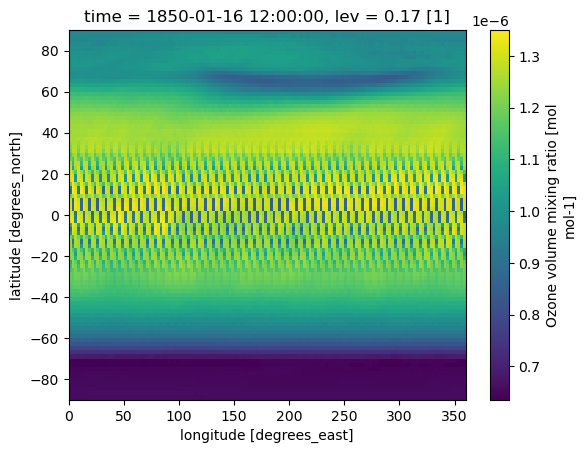

In [5]:
do['o3'].isel(time=0,lev=-1).plot()

In [12]:
# only use this when there is no need to change function again. As if you modify functions in util.py, and rerun the cell, it can't be updated.
from util import calculate_general_mass
from util import cal_O3_burden_raw 

In [37]:
%run ./functions.ipynb

In [38]:
do_du=calculate_total_ozone(do)

Minimum column ozone value: 180.9650865032724


In [39]:
do_du

<xarray.Dataset>
Dimensions:    (time: 612, bnds: 2, lev: 40, lat: 90, lon: 144)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 1900-12-16 12:00:00
  * lev        (lev) float64 0.95 0.93 0.91 0.89 0.87 ... 0.23 0.21 0.19 0.17
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1850-01-01 00:00:00 ... 1901-01-01 00:00:00
    lev_bnds   (lev, bnds) float64 0.96 0.94 0.94 0.92 ... 0.2 0.18 0.18 0.16
    p0         float64 1.0
    a          (lev) float64 0.734 0.9224 1.13 1.365 ... 93.39 52.81 30.01 17.23
    b          (lev) float64 1.0 0.9797 0.9573 ... 5.706e-10 1.177e-10 1.486e-11
    ps         (time, lat, lon) float32 ...
    a_bnds     (lev, bnds) float64 0.734 0.8282 0.8282 ... 23.62 23.62 10.0
    b_bnds     (lev, bnds) float64 1.0 0.9898 0.9898 ... 6.629e-11 6.629e-11 0.0
    lat_bnds   (lat, bnds) float64 -90.0 -88.0 -88.0 -86.0 ... 88.0 88.0 90.0
    lon_bnds   (lon, bnds) float64 0.0 2.5 2.5 5.0 ... 355.0 357.5 357.5 360.0
    o3         (time, lev, lat, lon) float32 2.118e-08 2.118e-08 ... 1.051e-06
    totO3      (time, lat, lon) float64 278.5 278.5 278.5 ... 334.4 334.4 334.4
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                Kenneth Lo (cdkkl@giss.nasa.gov)
    ...                     ...
    title:                  GISS-E2-1-G output prepared for CMIP6
    tracking_id:            hdl:21.14100/0597de11-e334-4b70-9ff6-435e00c6dca2
    variable_id:            o3
    variant_label:          r1i1p3f1
    license:                CMIP6 model data produced by NASA Goddard Institu...
    cmor_version:           3.3.2

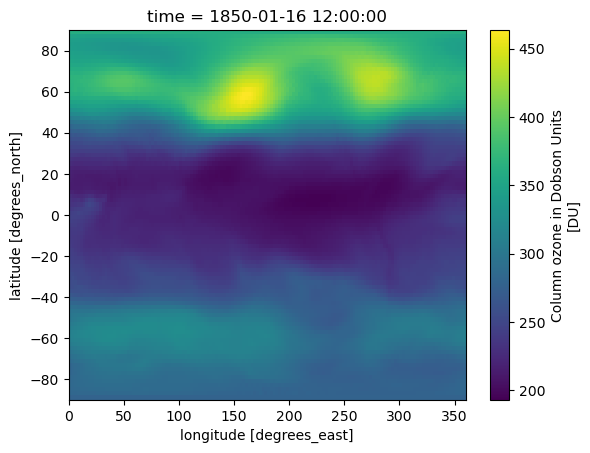

In [42]:
do_du.totO3.isel(time=0).plot()

In [19]:
s3path_noresm = "s3://escience2022/Zhihong/NFHISTnorpddmsbc_tropstratchem_f19_mg17_20220105_test08/cb_O3.NFHISTnorpddmsbc_tropstratchem_f19_mg17_20220105_test08.cam.h0.197001-201412.nc"

In [20]:
s3path_noresm

's3://escience2022/Zhihong/NFHISTnorpddmsbc_tropstratchem_f19_mg17_20220105_test08/cb_O3.NFHISTnorpddmsbc_tropstratchem_f19_mg17_20220105_test08.cam.h0.197001-201412.nc'

In [21]:
do_noresm=xr.open_dataset(s3.open(s3path_noresm))

In [23]:
do_noresm

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 144, lev: 32, ilev: 33, time: 540, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lev        (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * ilev       (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time       (time) object 1970-02-01 00:00:00 ... 2015-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    hyam       (lev) float64 ...
    hybm       (lev) float64 ...
    P0         float64 ...
    hyai       (ilev) float64 ...
    hybi       (ilev) float64 ...
    date       (time) int32 ...
    time_bnds  (time, nbnd) object ...
    PS         (time, lat, lon) float32 ...
    cb_O3      (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              NFHISTnorpddmsbc_tropstratchem_f19_mg17_20220105_test08
    logname:           olivie
    host:              
    initial_file:      NHIST_f19_tn14_20190710.cam.i.1970-01-01-00000.nc
    topography_file:   /cluster/shared/noresm/inputdata/atm/cam/topo/fv_1.9x2...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1
    history:           Fri Oct 28 00:07:52 2022: ncrcat /scratch/olivie/cmip6...
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....

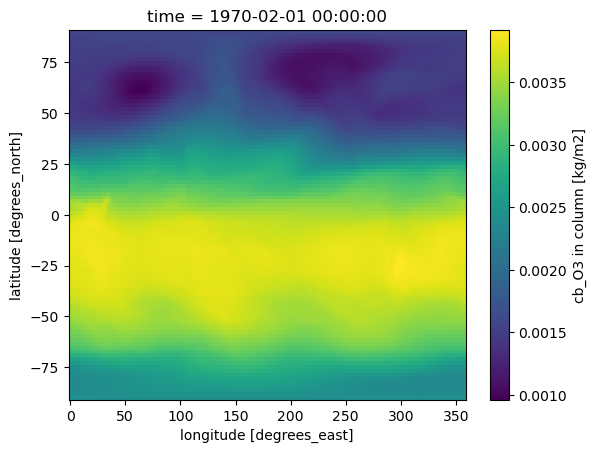

In [24]:
do_noresm['cb_O3'].isel(time=0).plot()